In [4]:
%pip install --upgrade diffusers[torch] -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
from diffusers import DiffusionPipeline, AutoencoderKL
import torch

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", 
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda");

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
prompt = "Picture a North Indian woman of white complexion, with a curvaceous bursty walking on the street, highlight hair, rim lighting, studio lighting, looking at the camera, up close, perfect eyes, bright colour in casual dress"
nprompt="disfigured, ugly, bad, different faces, dark skin, black skin, immature, cartoon, anime, 3d, painting, b&w, double images"
image = pipe(prompt=prompt, negative_prompt=nprompt, num_inference_steps=25, num_images_per_prompt = 4)

  0%|          | 0/25 [00:00<?, ?it/s]

In [3]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

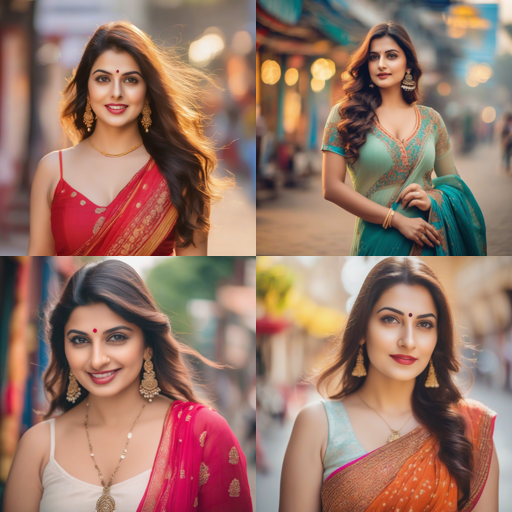

In [4]:
image_grid(image.images, 2, 2)